# Visualization of Taxonomic Distribution and Phylogeny

In [1]:
library(tidyverse)
library(reshape2)
library(ggplot2)
library(RColorBrewer)

library(tidytree)
library(treeio)
library(ggtree)
library(ggnewscale)
library(ggtreeExtra)
library(patchwork)
library(aplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


If you use the ggtree package suite in published research, please
cite the appropriate paper(s):

S Xu, Z Dai, P Guo, X Fu, S Liu, L Zhou, W Tang, T Feng, M Chen, L
Zhan, T Wu, E Hu, Y Jiang, X Bo, G Yu. ggtreeExtra: Compact
visualization of richly annotated phylogenetic data. Molecular Biology
and Evolution. 2021, 38(9):4039-4042. doi: 10.1093/molbev/msab166

Guangchuang Y

## Loading Tree file with Taxonomy,Rank and RED decoration
* Parse by ETEtookit in ete_parsetree.ipynb

In [2]:
single_arc_node=read.table("MEERv21_d95_gtdbr220_ar53_monophylogetic_RED.tsv",header = T,sep="\t")
single_bac_node=read.table("MEERv21_d95_gtdbr220_bac120_monophylogetic_RED.tsv",header=T,sep="\t")
#ggsave("Figures/F2B_Archcaea_RED_Distribution_0514.pdf",single_arc_distribute,width = 5,height = 4)

In [7]:
single_bac_node %>% group_by(rank) %>% count() %>% left_join(single_arc_node %>% group_by(rank) %>% count() ,by="rank") -> bibar_data
colnames(bibar_data) <-c("rank",'bacteria','archaea')
bibar_data$rank <- factor(c("Class","Family","Genus","Order","Phylum"),levels = rev(c("Phylum","Class","Order","Family","Genus")))
bibar_data[is.na(bibar_data)]<-0

In [8]:
bibar_data <- bibar_data %>% filter(rank!="Genus")

In [16]:
rank_color=setNames(c("#E63946","#ffa200","#0087cb","#24a8ac","#98DF8A"),c("Phylum","Class","Order","Family","Genus"))
bac_newtaxon <- ggplot(bibar_data,aes(x=rank,fill=rank))+geom_bar(aes(y=-bacteria),stat = "identity")+theme_classic()+
  theme(axis.line = element_blank(),axis.title.y = element_blank(),axis.text.y = element_text(size = 12),legend.position = "None",axis.ticks.y=element_blank())+
  ylab("Bacteria")+scale_x_discrete(position = "top")+scale_fill_manual(values = rank_color)+coord_flip()
  

arc_newtaxon <- ggplot(bibar_data,aes(x=rank,fill=rank))+geom_bar(aes(y=archaea),stat = "identity")+theme_classic()+
  theme(axis.line = element_blank(),axis.title.y = element_blank(),axis.ticks.y=element_blank(),
        axis.text.y = element_blank(),legend.position = "None")+scale_fill_manual(values = rank_color)+
  #scale_y_continuous(breaks = c(0,55,110),limits = c(0,110))+
  ylab("Archaea")+
  coord_flip()

newtaxon_bar <- (bac_newtaxon|arc_newtaxon)+plot_layout(widths = c(2, 1))#+plot_annotation(caption="Data were transformed with square root.",theme=theme(plot.caption = element_text(size = 16,hjust = 0.5))) -> newtaxon_bar

In [17]:
ggsave("Fig2B-1_20240531.pdf",newtaxon_bar,width = 12,height = 5)

In [ ]:
head(single_arc_node)

In [12]:
single_arc_node %>% filter(rank %in% c('class','order'))

Leaf_Names,RED,rank
<chr>,<dbl>,<chr>
FDZ062-GYBk8-10.bin.89,0.549,class
FDZ033-GG0-2.bin.1143,0.512,order
FDZ066-BawG0-2.bin.493,0.599,order


In [29]:
single_arc_node %>% mutate(rank=factor(str_to_title(rank),levels=c("Phylum","Class","Order","Family","Genus"))) %>% 
    ggplot()+geom_histogram(aes(x=RED,fill=rank),binwidth=.025)+theme_classic()+ggtitle("Archaea Monophyletic Clade RED Distribution")+
    scale_fill_manual(values =  rank_color,name='Rank')+theme(legend.position="none",plot.title=element_text(hjust=.5)) ->single_arc_distribute

In [32]:
single_bac_node  %>% mutate(rank=factor(str_to_title(rank),levels=c("Phylum","Class","Order","Family","Genus"))) %>% 
    ggplot()+geom_histogram(aes(x=RED,fill=rank),binwidth=.025)+theme_classic()+ggtitle("Bacteria Monophyletic Clade RED Distribution")+
    scale_fill_manual(values =rank_color,name='Rank')+ theme(plot.title=element_text(hjust=.5)) ->single_bac_distribute

In [33]:
single_bac_distribute +single_arc_distribute +plot_layout(guide = 'collect') ->RED_distribute

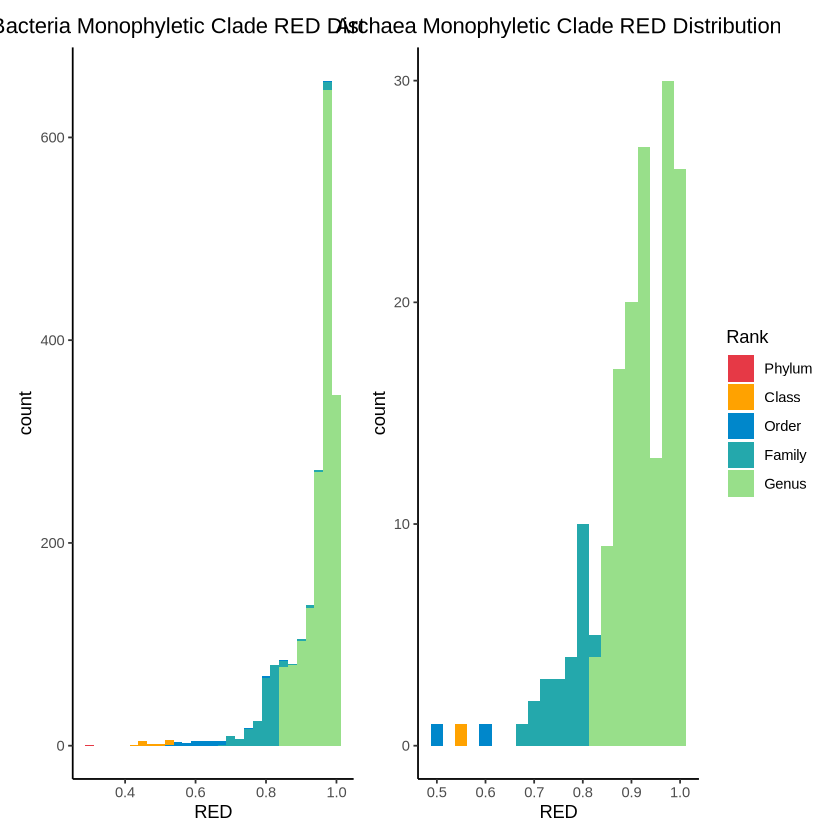

In [34]:
RED_distribute

In [28]:
ggsave("TREE_Monophyletic_RED_histogram_20240531.pdf",RED_distribute,width = 12,height = 5)

## Visualizing Trees

In [3]:
bac_decorate_tree <- read.tree("bin_ca_tetra_user_arctree_r220/gtdbtk.decorated.tree") #MMCv2.1 SGB trees
arc_decorate_tree <- read.tree("bin_ca_tetra_user_arctree_r220/gtdbtk.decorated.tree") #MMCv2.1 SGB trees
bac_ggtree <- ggtree(bac_decorate_tree, layout="fan")
arc_ggtree <- ggtree(arc_decorate_tree,layout="fan")
bac_treedata <- bac_ggtree$data
bac_treedata$label <- gsub("\'","",bac_treedata$label)
arc_treedata <- arc_ggtree$data
arc_treedata$label <- gsub("\'","",arc_treedata$label)

tmp_tree_arc <- arc_treedata
tmp_tree_arc$node <- arc_treedata$node+nrow(bac_treedata)
tmp_tree_arc$parent <- arc_treedata$parent+nrow(bac_treedata)
tmp_tree_arc$y <- tmp_tree_arc$y+max(bac_treedata$y)
arc_root <-tmp_tree_arc %>% filter(label=="d__Archaea") %>% pull(node)
tmp_tree_arc[which(tmp_tree_arc$node==arc_root),"x"]<- 0.5

tmp_tree_all <- bac_treedata %>% bind_rows(tmp_tree_arc)


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


In [ ]:
tmp_tree_all$label

In [4]:
determine_node <- function(x,tree_tbl){
    if(grepl(",",x)){
        split=unlist(strsplit(x,","))
        return(MRCA(tree_tbl,split,use.names = T))
    }else{
        a=tree_tbl[tree_tbl$label ==x,]
        return(a)
    }
}

In [5]:
#single_arc_node$Leaf_Names |> map_df(\(x) MRCA(tmp_tree_all,unlist(strsplit(x,","),use.names = T)))

monophyletic_archaea <- read.table("MEERv21_ar53_monophylogetic.list",header=FALSE)$V1
monophyletic_bacteria <- read.table("MEERv21_bac120_monophylogetic.list",header=FALSE)$V1


In [6]:
monophyletic_archaea |>map_df(\(x) determine_node(x,tmp_tree_all)) -> arc_monophylogenetic_groups

In [7]:
monophyletic_bacteria |>map_df(\(x) determine_node(x,tmp_tree_all)) -> bac_monophylogenetic_groups

In [8]:
mono_node=bind_rows(arc_monophylogenetic_groups,bac_monophylogenetic_groups)$node

In [23]:
length(mono_node)

[1] 2372

In [9]:
tmp_tree_all_2 <- groupClade(tmp_tree_all,mono_node) 
tmp_tree_all_2$group <- as.character(tmp_tree_all_2$group)
tmp_tree_all_2$group[which(tmp_tree_all_2$group!=0)] <- "Novel"
tmp_tree_all_2$group[which(tmp_tree_all_2$group==0)] <- "Known"
tmp_tree_all_2$group <- factor(tmp_tree_all_2$group,levels = c('Novel','Known'))
#tmp_tree_all_2$label <- gsub("\'","",tmp_tree_all_2$label)

In [10]:
parent_phylum<- unique(tmp_tree_all_2 %>% filter(grepl("p__",label)) %>% pull(node))
lc_phylum <- data.frame(parent_phylum,as.numeric(map(parent_phylum,function(x) {
  if (x >nrow(bac_treedata)) {return(length(offspring(arc_decorate_tree,x-nrow(bac_treedata),tiponly=T)))} # the size of bacterial MMC tree
  else {return(length(offspring(bac_decorate_tree,x,tiponly=T)))}
})))
colnames(lc_phylum)[2] <- "leaves_count"
lc_phylum <- arrange(lc_phylum,desc(leaves_count))
top10<- as.data.frame(tmp_tree_all_2 %>% filter(node %in% lc_phylum$parent_phylum[1:10]) %>% pull(node,label))
top10$name <- gsub("\'","",rownames(top10))
#top10$name <- gsub ("1.0:p__","",top10$name)
top10$name <- gsub ("[0-9.]+:p__","",top10$name)
top10$name <- gsub("; c__.*","",top10$name)
colnames(top10)[1] <- "node"

The "tiponly = TRUE" can be replaced by type="tips".

The "tiponly = TRUE" can be replaced by type="tips".

The "tiponly = TRUE" can be replaced by type="tips".

The "tiponly = TRUE" can be replaced by type="tips".

The "tiponly = TRUE" can be replaced by type="tips".

The "tiponly = TRUE" can be replaced by type="tips".

The "tiponly = TRUE" can be replaced by type="tips".

The "tiponly = TRUE" can be replaced by type="tips".

The "tiponly = TRUE" can be replaced by type="tips".

The "tiponly = TRUE" can be replaced by type="tips".

The "tiponly = TRUE" can be replaced by type="tips".

The "tiponly = TRUE" can be replaced by type="tips".

The "tiponly = TRUE" can be replaced by type="tips".

The "tiponly = TRUE" can be replaced by type="tips".

The "tiponly = TRUE" can be replaced by type="tips".

The "tiponly = TRUE" can be replaced by type="tips".

The "tiponly = TRUE" can be replaced by type="tips".

The "tiponly = TRUE" can be replaced by type="tips".

The "tiponly = TRUE" can be 

In [26]:
top10

,node,name
,<int>,<chr>
1.0:p__Patescibacteria,6821,Patescibacteria
0.993:p__Chloroflexota,8024,Chloroflexota
1.0:p__Planctomycetota,9519,Planctomycetota
1.0:p__Omnitrophota,10813,Omnitrophota
1.0:p__Marinisomatota,11006,Marinisomatota
1.0:p__Bacteroidota,11188,Bacteroidota
1.0:p__Zixibacteria; c__MSB-5A5,11598,Zixibacteria
0.99:p__Hydrogenedentota,11917,Hydrogenedentota
1.0:p__Pseudomonadota,12362,Pseudomonadota


In [130]:
lc_phylum[1:10,]

,parent_phylum,leaves_count
,<int>,<dbl>
1,8024,1342
2,9519,1153
3,6821,1143
4,12362,1032
5,14384,643
6,11188,358
7,11006,181
8,11598,160
9,11917,146


In [11]:
top10 <- top10[match(lc_phylum$parent_phylum[1:10],top10$node),] %>% mutate(SGB_count=lc_phylum$leaves_count[1:10])

In [3]:
tree_summary <- read.table("MEERv21_gtdbr220_taxonomy.tsv",sep="\t",header=T,row.name=1)
tree_summary<-tree_summary %>% rownames_to_column(var = 'SGB')
# tree_summary$Phylum[which(!tree_summary$Phylum %in% top10$name)] <- 'Others'
# tree_summary$Phylum <- factor(tree_summary$Phylum,levels = append(top10$name,'Others'))

In [13]:
tree_anno <- tree_summary %>% select(SGB,Phylum)
tree_anno$Phylum[which(!tree_anno$Phylum %in% top10$name)] <- 'Others'
tree_anno$Phylum <- factor(tree_anno$Phylum,levels = append(top10$name,'Others'))

In [15]:
tree_summary %>% head()

,SGB,Kingdom,Phylum,Class,Order,Family,Genus,Species
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,FDZ053-RBk20-22.bin.385,Archaea,Nanoarchaeota,Nanoarchaeia,Pacearchaeales,GW2011-AR1,JAGVXH01,
2,FDZ076-RGWu4-6.bin.298,Archaea,Nanoarchaeota,Nanoarchaeia,Woesearchaeales,JAGVZT01,,
3,FDZ072-GBeBe12-14.bin.7,Archaea,Nanoarchaeota,Nanoarchaeia,Pacearchaeales,GW2011-AR1,,
4,FDZ070-GBeBe8-10.bin.5,Archaea,Nanoarchaeota,Nanoarchaeia,Pacearchaeales,GW2011-AR1,BS150m-G67,
5,FDZ070-WuWY6-8.bin.299,Archaea,Nanoarchaeota,Nanoarchaeia,Pacearchaeales,GW2011-AR1,,
6,FDZ061-WW8-10.bin.116,Archaea,Nanoarchaeota,Nanoarchaeia,Woesearchaeales,UBA10216,,


In [14]:
quality <- read_csv("drep_all_95_greedy/data_tables/genomeInfo.csv")

Rows: 314378 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): genome
dbl (4): completeness, contamination, length, N50

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [15]:
quality$genome=gsub(".fa","",quality$genome)

In [16]:
quality %>% head

genome,completeness,contamination,length,N50
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
FDZ076-YW-C2-4.bin.100,20.04,0.000,NA,NA
FDZ076-YW-C2-4.bin.101,56.10,6.184,1977715,2253
FDZ076-YW-C2-4.bin.102,97.72,3.564,NA,NA
FDZ076-YW-C2-4.bin.103,47.10,4.921,NA,NA
FDZ076-YW-C2-4.bin.104,35.50,1.136,NA,NA
FDZ076-YW-C2-4.bin.105,25.24,0.495,NA,NA


In [17]:
d95_quality=quality[which(quality$genome %in% tree_summary$SGB),]

In [18]:
d95_quality %>% mutate(Quality=case_when((completeness>90 & contamination<5) ~ "High",.default="Medium")) ->d95_quality

In [38]:
d95_quality %>% head

genome,completeness,contamination,length,N50,Quality
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
FDZ076-YW-C2-4.bin.275,92.41,3.418,2946517,6882,High
FDZ033-RR0-2.bin.11,61.56,5.665,2026776,2281,Medium
FDZ033-RR0-2.bin.80,96.23,1.098,3504034,6749,High
FDZ050-RBk2-4.bin.114,55.01,3.387,2886268,2600,Medium
FDZ050-RBk2-4.bin.148,65.22,7.692,3172985,2728,Medium
FDZ050-RBk2-4.bin.188,84.22,1.676,4361264,3659,Medium


In [145]:
p <- ggtree(tmp_tree_all_2,color="grey30",layout = "fan",size=.05)+
geom_highlight(data = data.frame(node=mono_node,type=c("Unreported")),mapping = aes(node=node,fill=type),alpha=.7)+
scale_fill_manual(values = c('#FF7F50'))+
guides(fill=guide_legend(reverse = T,title = 'Novelty',title.theme = element_text(size=12,face = "bold"),label.theme = element_text(size=10)))
# First Annotation Layer for Phylum
p2 <- p+new_scale_fill()+geom_fruit(data=tree_anno,geom='geom_tile',aes(y=SGB,fill=Phylum,width=.12),offset = .1,pwidth = .2)+
  scale_fill_manual(values=append(brewer.pal(10,"Paired"),'grey80'))+guides(fill=guide_legend(title = "Phylum",title.theme = element_text(size=12,face = "bold"),label.theme = element_text(size=10)))

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message:
“The column of x aesthetic only have one unique value with `geom = geom_tile`,
and the `width` of `geom_tile()` is not provided, the `pwidth` will be as
`width`.”


In [33]:
saveRDS(p2,"P2.rds")

In [35]:
ggsave("tree1_0521.pdf",p2,width=14,height=12)

In [20]:
sgb_location <- read_tsv("profile/meerv2.1/SGB_locations.tsv")

Rows: 7564 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): SGB, Location

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [23]:
sgb_location %>% head

SGB,Location
<chr>,<fct>
FDZ031YE0-5.bin.230,YT
FDZ031YE0-5.bin.25,PB-N
FDZ031YE0-5.bin.262,YT
FDZ031YE0-5.bin.324,PB-N
FDZ031YE0-5.bin.33,YT
FDZ031YE0-5.bin.721,PB-N


In [22]:
sgb_location %>% mutate(Location=factor(Location,levels=c('MT','YT','PB-N','PB-S'))) ->sgb_location


In [146]:
Location_color=setNames(c("#FEE090","#DE77AE","#CCEBC5","#1F78B4"),c('MT','YT','PB-N','PB-S'))
p3 <- p2+new_scale_fill()+
geom_fruit(data=sgb_location,geom = "geom_tile",aes(y=SGB,x=Location,fill=Location,width=.06),offset = .04,pwidth = .1)+
scale_fill_manual(values = Location_color) +
guides(fill=guide_legend(title.theme = element_text(size=12,face = "bold"),label.theme = element_text(size=10)))

Warning message:
“Removed 1743 rows containing missing values or values outside the scale range
(`geom_tile()`).”


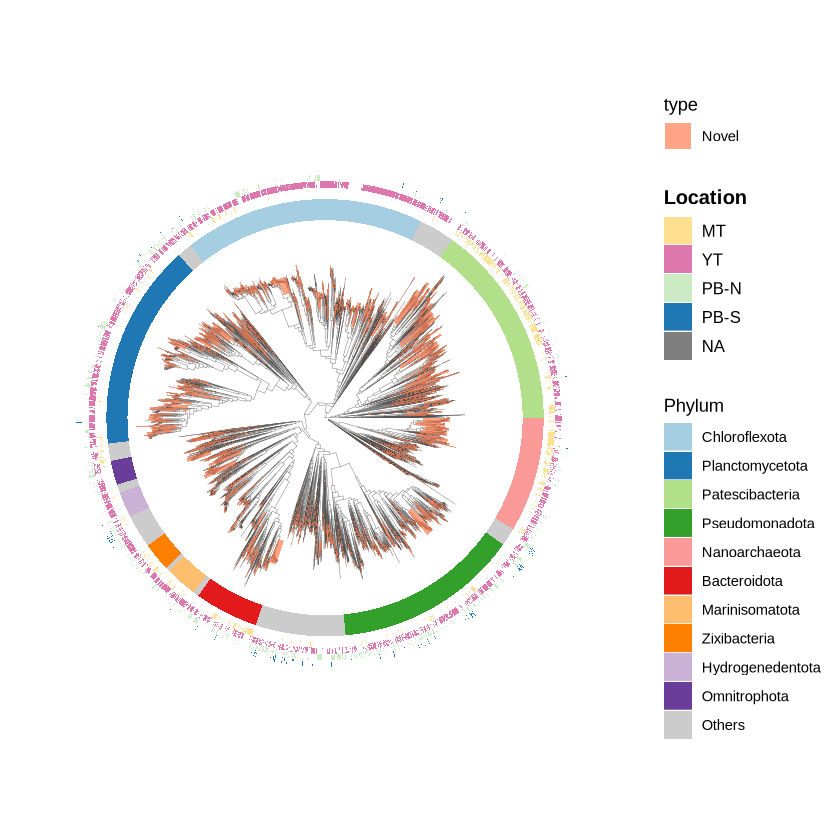

In [86]:
p3

In [52]:
ggsave("tree2_0522.pdf",p3,width=14,height=12)

Warning message:
“Removed 1743 rows containing missing values or values outside the scale range
(`geom_tile()`).”


In [25]:
sgb_layergroup <- read_tsv('profile/meerv2.1/SGB_layergroup.tsv')

Rows: 7564 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): SGB, LayerGroup

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [30]:
sgb_layergroup %>% select(LayerGroup) %>% unique

LayerGroup
<fct>
"(0, 10]"
NA
"(10, 20]"
"(20, 30]"
"(30, 40]"


In [29]:
sgb_layergroup$LayerGroup <- factor(sgb_layergroup$LayerGroup,levels=rev(c("(0, 10]","(10, 20]","(20, 30]","(30, 40]")))

In [147]:
p4 <- p3+new_scale_fill()+
geom_fruit(data=sgb_layergroup,geom = "geom_tile",aes(y=SGB,x=LayerGroup,fill=LayerGroup,width=.06),offset = .03,pwidth = .1,axis.params = list(axis="y",line.color='grey30'))+
scale_fill_manual(values = rev(c("#e5e8e8","#b1babb","#7e8c8d","#616a6b"))) +
guides(fill=guide_legend(reverse = T,title = 'Sediment Depth',title.theme = element_text(size=12,face = "bold"),label.theme = element_text(size=10)))

Warning message:
“Removed 1743 rows containing missing values or values outside the scale range
(`geom_tile()`).”
Warning message:
“Removed 2055 rows containing missing values or values outside the scale range
(`geom_tile()`).”


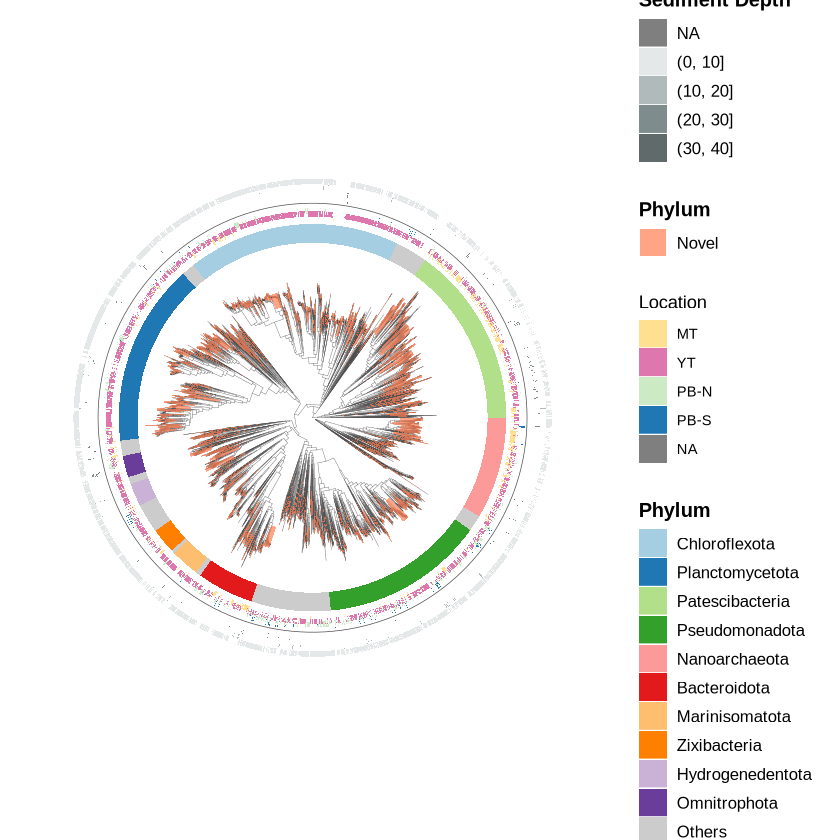

In [75]:
p4

In [148]:
d95_quality %>% mutate(Quality=factor(Quality,levels=c('Medium','High'))) ->d95_quality
p5 <- p4+new_scale_fill()+
geom_fruit(data=d95_quality,geom = "geom_tile",mapping=aes(y=genome,x=Quality,fill=Quality,width=.06),offset = .03,pwidth = .033,axis.params = list(axis="y",line.color='grey30'))+
scale_fill_manual(values=c("#76d7c3","#169f85")) +
guides(fill=guide_legend(reverse = T,title = 'Quality',title.theme = element_text(size=12,face = "bold"),label.theme = element_text(size=10)))+ 
geom_cladelab(node=arc_root,label = "Archaea",fontsize=0,align=T,offset=.02,barcolour="grey40")+
geom_hilight(node=arc_root,fill=NA, color="grey40",linewidth=.2,extendto=1.855) 

In [45]:
library(geomtextpath)

In [47]:
max(tmp_tree_all_2$x)

[1] 1.79574

In [149]:
p6 <- p5+geom_textpath(data=data.frame(x=c(1.79,1.79),y=c(7564,6820)),upright=F,size=5,label="Archaea",text_only = T)+
  geom_textpath(data=data.frame(x=c(1.79,1.79),y=c(1,6819)),upright=F,size=5,label="Bacteria",text_only = T)

In [150]:
ggsave("Prokayotes_MAGs_treeview20240522_v3.pdf",rotate_tree(p6,90),width = 14,height = 12)

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Warning message:
“Removed 1743 rows containing missing values or values outside the scale range
(`geom_tile()`).”
Warning message:
“Removed 2055 rows containing missing values or values outside the scale range
(`geom_tile()`).”


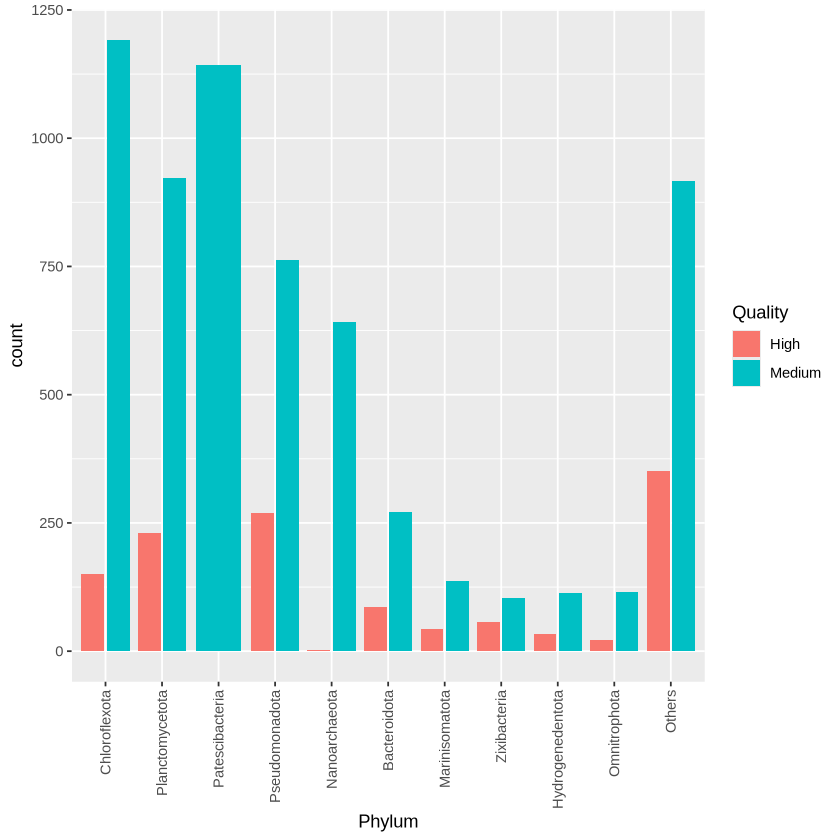

In [125]:
tree_anno %>% mutate(Quality=(d95_quality %>% column_to_rownames(var='genome'))[tree_anno$SGB,'Quality']) %>%
ggplot(aes(x=Phylum))+geom_bar(aes(fill=Quality),position=position_dodge2())+theme(axis.text.x=element_text(angle=90,hjust=1,vjust=0.5))
